# Final Project

In [239]:
# Load necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import json 
import sqlite3

## Milestone 2: Cleaning & Formatting a Flat File Source 

### Initial Exploration

In [240]:
# Load the data as a DataFrame using pandas library.

imdb_df = pd.read_csv("imdb.csv")

In [241]:
# Use head to view the first few rows.

imdb_df.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,Short,Sport,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550,3240,1921,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319,5700,1925,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007,9180,1927,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521,6420,1926,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057,5220,1931,video.movie,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


### Data Types, Dropping & Subsetting

In [242]:
# Convert any numerical data types from object to float (numeric)

imdb_df['imdbRating'] = imdb_df['imdbRating'].apply(pd.to_numeric, errors='coerce')
imdb_df['ratingCount'] = imdb_df['ratingCount'].apply(pd.to_numeric, errors='coerce')
imdb_df['duration'] = imdb_df['duration'].apply(pd.to_numeric, errors='coerce')
imdb_df['year'] = imdb_df['year'].apply(pd.to_numeric, errors='coerce')

In [244]:
# Drop columns that will not be used for the analysis.
# I used inplace = True rather than creating a new DataFrame.
# Use head() to confirm. 

imdb_df.drop('fn', axis=1, inplace=True)
imdb_df.drop('tid', axis=1, inplace=True)
imdb_df.drop('Unnamed: 44', axis=1, inplace=True)
imdb_df.drop('Unnamed: 45', axis=1, inplace=True)
imdb_df.drop('Unnamed: 46', axis=1, inplace=True)
imdb_df.drop('Unnamed: 47', axis=1, inplace=True)
imdb_df.drop('url', axis=1, inplace=True)
imdb_df.drop('type', axis=1, inplace=True)
imdb_df.head()

,title,wordsInTitle,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),der vagabund und das kind,8.4,40550.0,3240.0,1921.0,1,0,19,96,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),goldrausch,8.3,45319.0,5700.0,1925.0,2,1,35,110,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),metropolis,8.4,81007.0,9180.0,1927.0,3,4,67,428,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),der general,8.3,37521.0,6420.0,1926.0,1,1,53,123,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),lichter der gro stadt,8.7,70057.0,5220.0,1931.0,2,0,38,187,...,0,0,1,0,0,0,0,0,0,0


### Convert Duration from Seconds to Whole Minutes

In [245]:
# Knowing that our average duration is 5626 x, it is difficult to interpret 
# this.  I am going to assume seconds, as 5626 seconds is 93.8 minutes.
# As it appears the duration of movies are in seconds, lets convert
# this to whole minutes. 

imdb_df['duration'] = imdb_df['duration'].divide(60)

In [246]:
# Confirm that the updates were made correctly.

imdb_df['duration'].describe()

count    13722.000000
mean        96.654246
std        128.471447
min          0.033333
25%         60.000000
50%         95.000000
75%        111.000000
max       6318.566667
Name: duration, dtype: float64

### Missing Values

In [247]:
# Check for variables that have missing values.

for c in imdb_df.columns:
    missing = imdb_df[c].isnull().sum()
    if missing > 0:
        print("{} has {} missing value(s)".format(c, missing))
    else:
        print("{} has NO missing value(s)".format(c, missing))

title has NO missing value(s)
wordsInTitle has 13 missing value(s)
imdbRating has 1608 missing value(s)
ratingCount has 1248 missing value(s)
duration has 1039 missing value(s)
year has 46 missing value(s)
nrOfWins has 1 missing value(s)
nrOfNominations has NO missing value(s)
nrOfPhotos has NO missing value(s)
nrOfNewsArticles has NO missing value(s)
nrOfUserReviews has NO missing value(s)
nrOfGenre has NO missing value(s)
Action has NO missing value(s)
Adult has NO missing value(s)
Adventure has NO missing value(s)
Animation has NO missing value(s)
Biography has NO missing value(s)
Comedy has NO missing value(s)
Crime has NO missing value(s)
Documentary has NO missing value(s)
Drama has NO missing value(s)
Family has NO missing value(s)
Fantasy has NO missing value(s)
FilmNoir has NO missing value(s)
GameShow has NO missing value(s)
History has NO missing value(s)
Horror has NO missing value(s)
Music has NO missing value(s)
Musical has NO missing value(s)
Mystery has NO missing value

In [248]:
# As our data set is sufficient in size, we can drop rows where the value of
# the imdbRating is missing as imdbRating is important to be accurate for the analysis.
# I also chose to drop rows with missing NA values for year and duration,
# as it does not make sense to have a zero for these values.

imdb_df.dropna(subset=['imdbRating'], inplace=True)
imdb_df.dropna(subset=['duration'], inplace=True)
imdb_df.dropna(subset=['year'], inplace=True)

### Outliers

In [249]:
# Fill the remaining NA count fields with 0.

imdb_df.fillna('0')

,title,wordsInTitle,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),der vagabund und das kind,8.4,40550.0,54.0,1921.0,1,0,19,96,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),goldrausch,8.3,45319.0,95.0,1925.0,2,1,35,110,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),metropolis,8.4,81007.0,153.0,1927.0,3,4,67,428,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),der general,8.3,37521.0,107.0,1926.0,1,1,53,123,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),lichter der gro stadt,8.7,70057.0,87.0,1931.0,2,0,38,187,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14755,Parker Lewis - Der Coole von der Schule Parker...,parker lewis der coole von der schule parker l...,7.6,16.0,30.0,1991.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14756,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,7.7,135.0,24.0,2005.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14757,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,7.3,8.0,90.0,1957.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14758,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,7.0,20.0,60.0,1996.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [250]:
imdb_df['nrOfWins'] = imdb_df['nrOfWins'].apply(pd.to_numeric, errors='coerce')
imdb_df['nrOfNominations'] = imdb_df['nrOfNominations'].apply(pd.to_numeric, errors='coerce')
imdb_df['nrOfPhotos'] = imdb_df['nrOfPhotos'].apply(pd.to_numeric, errors='coerce')
imdb_df['nrOfNewsArticles'] = imdb_df['nrOfNewsArticles'].apply(pd.to_numeric, errors='coerce')

In [251]:
# Lets look at the smallest 20 values to determine if any of these are outliers.
# It's difficult to say about the various low values (0-4), as there are many
# in this range. 

imdb_df['duration'].nsmallest(20)

13682    0.033333
12691    0.366667
1362     1.000000
3377     1.000000
6909     1.000000
6910     1.000000
11562    1.000000
13228    1.000000
2519     2.000000
5578     2.000000
7600     2.000000
7694     2.000000
7941     2.000000
9881     2.000000
10971    2.000000
3835     3.000000
4074     3.000000
7486     3.000000
9054     3.000000
9464     3.000000
Name: duration, dtype: float64

In [252]:
imdb_df['duration'].nlargest(20)

7535     1140.0
10732     910.0
13370     877.0
2162      770.0
4107      750.0
12782     720.0
3366      705.0
13578     608.0
12529     583.0
11084     566.0
4190      552.0
14479     501.0
2983      500.0
12648     480.0
14315     480.0
3266      470.0
11911     450.0
10585     442.0
4865      434.0
1976      427.0
Name: duration, dtype: float64

In [253]:
# Let's drop the rows with these values by using their index.

imdb_df.drop([7535, 13682, 12691], inplace=True)

In [254]:
imdb_df['Title'] = imdb_df['wordsInTitle']

In [255]:
imdb_df.dtypes

title                object
wordsInTitle         object
imdbRating          float64
ratingCount         float64
duration            float64
year                float64
nrOfWins              int64
nrOfNominations       int64
nrOfPhotos            int64
nrOfNewsArticles      int64
nrOfUserReviews       int64
nrOfGenre             int64
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
FilmNoir              int64
GameShow              int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
RealityTV             int64
Romance               int64
SciFi                 int64
Short                 int64
Sport               

In [256]:
imdb_df.drop(['title'], axis=1, inplace=True)
imdb_df.drop(['wordsInTitle'], axis=1, inplace=True)
imdb_df.drop(['nrOfGenre'], axis=1, inplace=True)
imdb_df.drop(['Action'], axis=1, inplace=True)
imdb_df.drop(['Adult'], axis=1, inplace=True)
imdb_df.drop(['Adventure'], axis=1, inplace=True)
imdb_df.drop(['Animation'], axis=1, inplace=True)
imdb_df.drop(['Biography'], axis=1, inplace=True)
imdb_df.drop(['Comedy'], axis=1, inplace=True)
imdb_df.drop(['Crime'], axis=1, inplace=True)
imdb_df.drop(['Documentary'], axis=1, inplace=True)
imdb_df.drop(['Drama'], axis=1, inplace=True)
imdb_df.drop(['Family'], axis=1, inplace=True)
imdb_df.drop(['Fantasy'], axis=1, inplace=True)
imdb_df.drop(['FilmNoir'], axis=1, inplace=True)
imdb_df.drop(['GameShow'], axis=1, inplace=True)
imdb_df.drop(['History'], axis=1, inplace=True)
imdb_df.drop(['Horror'], axis=1, inplace=True)
imdb_df.drop(['Music'], axis=1, inplace=True)
imdb_df.drop(['Musical'], axis=1, inplace=True)
imdb_df.drop(['Mystery'], axis=1, inplace=True)
imdb_df.drop(['News'], axis=1, inplace=True)
imdb_df.drop(['RealityTV'], axis=1, inplace=True)
imdb_df.drop(['Romance'], axis=1, inplace=True)
imdb_df.drop(['SciFi'], axis=1, inplace=True)
imdb_df.drop(['Short'], axis=1, inplace=True)
imdb_df.drop(['Sport'], axis=1, inplace=True)
imdb_df.drop(['TalkShow'], axis=1, inplace=True)
imdb_df.drop(['Thriller'], axis=1, inplace=True)
imdb_df.drop(['War'], axis=1, inplace=True)
imdb_df.drop(['Western'], axis=1, inplace=True)

In [257]:
imdb_df.head()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,Title
0,8.4,40550.0,54.0,1921.0,1,0,19,96,85,der vagabund und das kind
1,8.3,45319.0,95.0,1925.0,2,1,35,110,122,goldrausch
2,8.4,81007.0,153.0,1927.0,3,4,67,428,376,metropolis
3,8.3,37521.0,107.0,1926.0,1,1,53,123,219,der general
4,8.7,70057.0,87.0,1931.0,2,0,38,187,186,lichter der gro stadt


## Milestone 3: Cleaning/Formatting Website Data

### Importing & Exploring the Website

In [335]:
# Open the website as read only using BeautifulSoup

with open('IMDb Top 250 - IMDb.html', "r") as fd:
    soup = BeautifulSoup(fd)
    print(type(soup))

<class 'bs4.BeautifulSoup'>


In [336]:
# The document is read and the type and length are printed.
# As our first row in the table structure is column headings,
# we will assign a variable for the headers and another variable
# for the rest of the rows. We create two seperate lists of the contents 
# that we've split, as preparation for the DataFrame. 

with open('IMDb Top 250 - IMDb.html', "r") as fd:
    soup = BeautifulSoup(fd)
    data = soup.findAll('tr')
    print("Data is a {} and {} items long.".format(type(data), len(data)))
    data_without_header = data[1:]
    headers = data[0]
    print(headers)
    col_headers = [th.getText() for th in headers.findAll('th')]
    print("The column headers are {}".format(col_headers))
    df_data = [[td.getText() for td in tr.findAll('td')] for tr in data_without_header]
    print(df_data)
    df = pd.DataFrame(df_data, columns=col_headers)

Data is a <class 'bs4.element.ResultSet'> and 251 items long.
<tr>
<th></th>
<th>Rank &amp; Title</th>
<th>IMDb Rating</th>
<th>Your Rating</th>
<th></th>
</tr>
The column headers are ['', 'Rank & Title', 'IMDb Rating', 'Your Rating', '']
[['\n\n\n\n\n\n \n ', '\n      1.\n      The Shawshank Redemption\n(1994)\n', '\n9.2\n', '\n\n\n\n\xa012345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen\n\n\n', '\n\n'], ['\n\n\n\n\n\n \n ', '\n      2.\n      The Godfather\n(1972)\n', '\n9.1\n', '\n\n\n\n\xa012345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen\n\n\n', '\n\n'], ['\n\n\n\n\n\n \n ', '\n      3.\n      The Godfather: Part II\n(1974)\n', '\n9.0\n', '\n\n\n\n\xa012345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen\n\n\n', '\n\n'], ['\n\n\n\n\n\n \n ', '\n      4.\n      The Dark Knight\n(2008)\n', '\n9.0\n', '\n\n\n\n\xa012345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen\n\n\n', '\n\n'], ['\n\n\n\n\n\n \n ', '\n      5.\n      12 Angry Men\n(1957)\n', '\n8.9\n', '\n\n\n\n\xa012345678910 \n\n\n\nNOT YET R

### Transforming the DataFrame

In [265]:
# We've created our DataFrame so let's take a glimpse.  

df.head()

,,Rank & Title,IMDb Rating,Your Rating,
0,\n\n\n\n\n\n \n,\n 1.\n The Shawshank Redemption\n(1...,\n9.2\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
1,\n\n\n\n\n\n \n,\n 2.\n The Godfather\n(1972)\n,\n9.1\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
2,\n\n\n\n\n\n \n,\n 3.\n The Godfather: Part II\n(197...,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
3,\n\n\n\n\n\n \n,\n 4.\n The Dark Knight\n(2008)\n,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
4,\n\n\n\n\n\n \n,\n 5.\n 12 Angry Men\n(1957)\n,\n8.9\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n


In [266]:
# Let's take a closer look at the formatting of Rank & Title

print(df['Rank & Title'])

0      \n      1.\n      The Shawshank Redemption\n(1...
1              \n      2.\n      The Godfather\n(1972)\n
2      \n      3.\n      The Godfather: Part II\n(197...
3            \n      4.\n      The Dark Knight\n(2008)\n
4               \n      5.\n      12 Angry Men\n(1957)\n
                             ...                        
245    \n      246.\n      Neon Genesis Evangelion: T...
246                     \n      247.\n      PK\n(2014)\n
247                \n      248.\n      Aladdin\n(1992)\n
248                 \n      249.\n      Swades\n(2004)\n
249    \n      250.\n      Lagaan: Once Upon a Time i...
Name: Rank & Title, Length: 250, dtype: object


In [267]:
# We have 3 types of information in Rank & Title so I split
# this column up into seperate columns.

df[['Blank', 'Rank', 'Title', 'Year', 'Blank']] = df['Rank & Title'].str.rsplit('\n',expand=True)

In [268]:
df.head()

,,Rank & Title,IMDb Rating,Your Rating,,Blank,Rank,Title,Year
0,\n\n\n\n\n\n \n,\n 1.\n The Shawshank Redemption\n(1...,\n9.2\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n,,1.,The Shawshank Redemption,(1994)
1,\n\n\n\n\n\n \n,\n 2.\n The Godfather\n(1972)\n,\n9.1\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n,,2.,The Godfather,(1972)
2,\n\n\n\n\n\n \n,\n 3.\n The Godfather: Part II\n(197...,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n,,3.,The Godfather: Part II,(1974)
3,\n\n\n\n\n\n \n,\n 4.\n The Dark Knight\n(2008)\n,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n,,4.,The Dark Knight,(2008)
4,\n\n\n\n\n\n \n,\n 5.\n 12 Angry Men\n(1957)\n,\n8.9\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n,,5.,12 Angry Men,(1957)


In [269]:
# Our first column above shows up as blank with new lines rather than empty
# so we can drop this entire column.

df.drop('', axis=1, inplace=True)
df.head()

,Rank & Title,IMDb Rating,Your Rating,Blank,Rank,Title,Year
0,\n 1.\n The Shawshank Redemption\n(1...,\n9.2\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,1.,The Shawshank Redemption,(1994)
1,\n 2.\n The Godfather\n(1972)\n,\n9.1\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,2.,The Godfather,(1972)
2,\n 3.\n The Godfather: Part II\n(197...,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,3.,The Godfather: Part II,(1974)
3,\n 4.\n The Dark Knight\n(2008)\n,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,4.,The Dark Knight,(2008)
4,\n 5.\n 12 Angry Men\n(1957)\n,\n8.9\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,5.,12 Angry Men,(1957)


In [270]:
# Take another look at the column headers to see if anything else should
# be dropped at this time.

df.columns

Index(['Rank & Title', 'IMDb Rating', 'Your Rating', 'Blank', 'Rank', 'Title',
       'Year'],
      dtype='object')

In [271]:
# I converted the rating type to a floater in order to remove the new lines.

df['IMDb Rating'] = df['IMDb Rating'].astype(float)
df.head()

,Rank & Title,IMDb Rating,Your Rating,Blank,Rank,Title,Year
0,\n 1.\n The Shawshank Redemption\n(1...,9.2,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,1.,The Shawshank Redemption,(1994)
1,\n 2.\n The Godfather\n(1972)\n,9.1,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,2.,The Godfather,(1972)
2,\n 3.\n The Godfather: Part II\n(197...,9.0,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,3.,The Godfather: Part II,(1974)
3,\n 4.\n The Dark Knight\n(2008)\n,9.0,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,4.,The Dark Knight,(2008)
4,\n 5.\n 12 Angry Men\n(1957)\n,8.9,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,5.,12 Angry Men,(1957)


In [272]:
df['Title'] = df['Title'].astype(str)
df['Title'] = df['Title'].apply(lambda x: x.lower()) 
df['Title'] =df['Title'].str.strip()

In [273]:
# Let's check our data types

print(df.dtypes)

Rank & Title     object
IMDb Rating     float64
Your Rating      object
Blank            object
Rank             object
Title            object
Year             object
dtype: object


In [274]:
# In order to remove the trailing decimal place in Rank, we can convert 
# to a floater and then an integer.

df['Rank'] = df['Rank'].astype(float)
df['Rank'] = df['Rank'].astype(int)
df.head()

,Rank & Title,IMDb Rating,Your Rating,Blank,Rank,Title,Year
0,\n 1.\n The Shawshank Redemption\n(1...,9.2,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,1,the shawshank redemption,(1994)
1,\n 2.\n The Godfather\n(1972)\n,9.1,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,2,the godfather,(1972)
2,\n 3.\n The Godfather: Part II\n(197...,9.0,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,3,the godfather: part ii,(1974)
3,\n 4.\n The Dark Knight\n(2008)\n,9.0,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,4,the dark knight,(2008)
4,\n 5.\n 12 Angry Men\n(1957)\n,8.9,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,,5,12 angry men,(1957)


In [275]:
# Let's clean up the DataFrame a bit more and drop columns with repeat
# information or information that will not be used.

df.drop('Rank & Title', axis=1, inplace=True)
df.drop('Your Rating', axis=1, inplace=True)
df.drop('Blank', axis=1, inplace=True)
df.head()

,IMDb Rating,Rank,Title,Year
0,9.2,1,the shawshank redemption,(1994)
1,9.1,2,the godfather,(1972)
2,9.0,3,the godfather: part ii,(1974)
3,9.0,4,the dark knight,(2008)
4,8.9,5,12 angry men,(1957)


In [276]:
# Let's extract the year from within the parenthesis 

df['Year'] = df['Year'].str.extract('(\d\d\d\d)', expand=True)
df['Year']

0      1994
1      1972
2      1974
3      2008
4      1957
       ... 
245    1997
246    2014
247    1992
248    2004
249    2001
Name: Year, Length: 250, dtype: object

In [280]:
# Year is considered an object and istype() would not convert to an 
# integer so I used the method below.

df['Year'] = df['Year'].apply(pd.to_numeric, errors='coerce')

### Add a Column by Decade

In [285]:
# Use a for loop to loop through the Years and assign a decade

by_decade = []

for x in df['Year']:
    if x >= 1920 and x < 1930:
        by_decade.append("Twenties")
    if x >= 1930 and x < 1940:
        by_decade.append("Thirties")
    if x >= 1940 and x < 1950:
        by_decade.append("Forties")
    if x >= 1950 and x < 1960:
        by_decade.append("Fifties")
    if x >= 1960 and x < 1970:
        by_decade.append("Sixties")
    if x >= 1970 and x < 1980:
        by_decade.append("Seventies")
    if x >= 1980 and x < 1990:
        by_decade.append("Eighties")
    if x >= 1990 and x < 2000:
        by_decade.append("Nineties")
    if x >= 2000 and x < 2010:
        by_decade.append("Two Thousands")
    if x >= 2010 and x < 2020:
        by_decade.append("Twenty Ten")
        

In [286]:
# Add the list as a variable ('By Decade') to the DataFrame

df['By Decade'] = by_decade

In [287]:
# Create a list of movie titles in the data frame (milestone 3)
# to be used for searching

movie_title = df['Title']
list_titles = movie_title.tolist()

In [288]:
# Print out list of titles from milestone 3 to view

print(list_titles)

['the shawshank redemption', 'the godfather', 'the godfather: part ii', 'the dark knight', '12 angry men', "schindler's list", 'the lord of the rings: the return of the king', 'pulp fiction', 'the good, the bad and the ugly', 'the lord of the rings: the fellowship of the ring', 'fight club', 'forrest gump', 'inception', 'star wars: episode v - the empire strikes back', 'the lord of the rings: the two towers', 'the matrix', 'goodfellas', "one flew over the cuckoo's nest", 'seven samurai', 'se7en', 'life is beautiful', 'city of god', 'the silence of the lambs', "it's a wonderful life", 'star wars: episode iv - a new hope', 'saving private ryan', 'spirited away', 'parasite', 'the green mile', 'interstellar', 'lã©on: the professional', 'the usual suspects', 'harakiri', 'the lion king', 'back to the future', 'the pianist', 'terminator 2: judgment day', 'american history x', 'modern times', 'psycho', 'gladiator', 'city lights', 'the departed', 'the intouchables', 'whiplash', 'the prestige', 

In [289]:
df.head()

,IMDb Rating,Rank,Title,Year,By Decade
0,9.2,1,the shawshank redemption,1994,Nineties
1,9.1,2,the godfather,1972,Seventies
2,9.0,3,the godfather: part ii,1974,Seventies
3,9.0,4,the dark knight,2008,Two Thousands
4,8.9,5,12 angry men,1957,Fifties


## Milestone 4: Connecting to an API, Pulling the Data & Cleaning/Formatting

### Accessing the API & Returning a DataFrame

In [290]:
# Define base URL

service_url = 'http://www.omdbapi.com/?'

In [291]:
# Define API key

api_key = '&apikey=7f3f0d1e'

In [292]:
# Define an empty list to add movie results to

df_list = []

In [293]:
# Create a function to read the url as json and add each element 
# to the empty list
# Use try/except for error handling

def get_movie(x):

    try:
        url = service_url + urllib.parse.urlencode({'t':str(x)})+api_key
        uh = urllib.request.urlopen(url)
        data = uh.read()
        y = json.loads(data)
        if y['Response']=='True':
            df_list.append(y)
                
    except urllib.error.URLError as e:
        print(f"Error: {e.reason}")

In [294]:
for x in list_titles:
    get_movie(x)
    df1 = pd.DataFrame(df_list, columns=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre',
                'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
                'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 
                 'imdbVotes', 'imdbID'])

In [295]:
df1.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,262,412",tt0111161
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,562,921",tt0068646
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,092,664",tt0071562
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,223,970",tt0468569
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 9 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"661,536",tt0050083


### Exploring & Transforming the DataFrame

In [296]:
df1.shape

(246, 19)

In [297]:
# Lets take a closer look at one of the ratings

print(df1['Ratings'][1])

[{'Source': 'Internet Movie Database', 'Value': '9.2/10'}, {'Source': 'Rotten Tomatoes', 'Value': '98%'}, {'Source': 'Metacritic', 'Value': '100/100'}]


In [298]:
# We have a dictionary within our DataFrame column 'Ratings', so let's split this up by site

df1[['Internet Movie Database', 'Rotten Tomatoes', 'Metacritic']] = df1['Ratings'].apply(pd.Series)
df1.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Internet Movie Database,Rotten Tomatoes,Metacritic
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,...,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,262,412",tt0111161,"{'Source': 'Internet Movie Database', 'Value':...","{'Source': 'Rotten Tomatoes', 'Value': '90%'}","{'Source': 'Metacritic', 'Value': '80/100'}"
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,...,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,562,921",tt0068646,"{'Source': 'Internet Movie Database', 'Value':...","{'Source': 'Rotten Tomatoes', 'Value': '98%'}","{'Source': 'Metacritic', 'Value': '100/100'}"
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,...,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,092,664",tt0071562,"{'Source': 'Internet Movie Database', 'Value':...","{'Source': 'Rotten Tomatoes', 'Value': '98%'}","{'Source': 'Metacritic', 'Value': '90/100'}"
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,...,Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,223,970",tt0468569,"{'Source': 'Internet Movie Database', 'Value':...","{'Source': 'Rotten Tomatoes', 'Value': '94%'}","{'Source': 'Metacritic', 'Value': '84/100'}"
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,...,Nominated for 3 Oscars. Another 16 wins & 9 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"661,536",tt0050083,"{'Source': 'Internet Movie Database', 'Value':...","{'Source': 'Rotten Tomatoes', 'Value': '100%'}","{'Source': 'Metacritic', 'Value': '96/100'}"


In [300]:
# Convert object data to numerical(int or float) where necessary

df1['Year'] = df1['Year'].apply(pd.to_numeric, errors='coerce')
df1['Metascore'] = df1['Metascore'].apply(pd.to_numeric, errors='coerce')
df1['imdbRating'] = df1['imdbRating'].apply(pd.to_numeric, errors='coerce')
df1['imdbVotes'] = df1['imdbVotes'].apply(pd.to_numeric, errors='coerce')

In [302]:
# Drop columns that will not be used

df1.drop('Director', axis=1, inplace=True)
df1.drop('Writer', axis=1, inplace=True)
df1.drop('Actors', axis=1, inplace=True)
df1.drop('Plot', axis=1, inplace=True)
df1.drop('Awards', axis=1, inplace=True)
df1.drop('Poster', axis=1, inplace=True)

In [303]:
# We have numbers and minutes in runtime, so lets split it

df1[['RunTime (minutes)', 'units']] = df1['Runtime'].str.rsplit(' ',expand=True)

In [304]:
# We can drop the older columns to keep runtime in minutes
# We can also drop "Ratings" as we've split that up

df1.drop('units', axis=1, inplace=True)
df1.drop('Runtime', axis=1, inplace=True)
df1.drop('Ratings', axis=1, inplace=True)

In [305]:
df1['RunTime (minutes)'] = df1['RunTime (minutes)'].apply(pd.to_numeric, errors='coerce')

In [306]:
df1.drop('imdbID', axis=1, inplace=True)

In [307]:
df1.drop('imdbVotes', axis=1, inplace=True)

In [308]:
df1.drop('Internet Movie Database', axis=1, inplace=True)
df1.drop('Rotten Tomatoes', axis=1, inplace=True)
df1.drop('Metacritic', axis=1, inplace=True)

In [309]:
df1.head()

,Title,Year,Rated,Released,Genre,Language,Country,Metascore,imdbRating,RunTime (minutes)
0,The Shawshank Redemption,1994,R,14 Oct 1994,Drama,English,USA,80.0,9.3,142
1,The Godfather,1972,R,24 Mar 1972,"Crime, Drama","English, Italian, Latin",USA,100.0,9.2,175
2,The Godfather: Part II,1974,R,18 Dec 1974,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",USA,90.0,9.0,202
3,The Dark Knight,2008,PG-13,18 Jul 2008,"Action, Crime, Drama, Thriller","English, Mandarin","USA, UK",84.0,9.0,152
4,12 Angry Men,1957,Approved,10 Apr 1957,"Crime, Drama",English,USA,96.0,8.9,96


In [310]:
df1['Title'] = df1['Title'].apply(lambda x: x.lower()) 

## Milestone 5: Merging the Data & Storing in a Database

In [316]:
# Use connect function to connect to database

conn = sqlite3.connect('FinalProject1.db')

In [317]:
# Convert DataFrame to SQL table 'MILESTONE2' in FinalProject1 database

imdb_df.to_sql('MILESTONE2', conn, if_exists='replace', index=False)

In [318]:
# Convert DataFrame to SQL table 'MILESTONE3' in FinalProject1 database

df.to_sql('MILESTONE3', conn, if_exists='replace', index=False)

C:\Users\17742\Anaconda3\lib\site-packages\pandas\core\generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [319]:
# Convert DataFrame to SQL table 'MILESTONE4' in FinalProject1 database

df1.to_sql('MILESTONE4', conn, if_exists='replace', index=False)

In [320]:
# Use function to pass in connection and check if the connection is open.
# If it is open, we will be able to select all columns from milestone 2 table
# using * and limit clause to limit number of rows to 1.
# Return true if we are successful. If we receive an error, the function 
# will return the error and False.

def is_opened(conn):
    try:
        conn.execute("SELECT * FROM milestone2 LIMIT 1")
        return True
    except sqlite3.ProgrammingError as e:
        print("Connection closed {}".format(e))
        return False

In [321]:
# Call the function passing in our database connection

is_opened(conn)

True

In [322]:
# Create a cursor object which will act as a medium to communicate with our database

c= conn.cursor()

In [323]:
# Lets take a glimpse at each table to confirm the data was loaded correctly

mile2 = c.execute("SELECT * FROM milestone2 LIMIT 5")
for x in mile2:
    print(x)

(8.4, 40550.0, 54.0, 1921.0, 1, 0, 19, 96, 85, 'der vagabund und das kind')
(8.3, 45319.0, 95.0, 1925.0, 2, 1, 35, 110, 122, 'goldrausch')
(8.4, 81007.0, 153.0, 1927.0, 3, 4, 67, 428, 376, 'metropolis')
(8.3, 37521.0, 107.0, 1926.0, 1, 1, 53, 123, 219, 'der general')
(8.7, 70057.0, 87.0, 1931.0, 2, 0, 38, 187, 186, 'lichter der gro stadt')


In [324]:
mile3 = c.execute("SELECT * FROM milestone3 LIMIT 5")
for y in mile3:
    print(y)

(9.2, 1, 'the shawshank redemption', 1994, 'Nineties')
(9.1, 2, 'the godfather', 1972, 'Seventies')
(9.0, 3, 'the godfather: part ii', 1974, 'Seventies')
(9.0, 4, 'the dark knight', 2008, 'Two Thousands')
(8.9, 5, '12 angry men', 1957, 'Fifties')


In [325]:
mile4 = c.execute("SELECT * FROM milestone4 LIMIT 5")
for z in mile4:
    print(z)

('the shawshank redemption', 1994, 'R', '14 Oct 1994', 'Drama', 'English', 'USA', 80.0, 9.3, 142)
('the godfather', 1972, 'R', '24 Mar 1972', 'Crime, Drama', 'English, Italian, Latin', 'USA', 100.0, 9.2, 175)
('the godfather: part ii', 1974, 'R', '18 Dec 1974', 'Crime, Drama', 'English, Italian, Spanish, Latin, Sicilian', 'USA', 90.0, 9.0, 202)
('the dark knight', 2008, 'PG-13', '18 Jul 2008', 'Action, Crime, Drama, Thriller', 'English, Mandarin', 'USA, UK', 84.0, 9.0, 152)
('12 angry men', 1957, 'Approved', '10 Apr 1957', 'Crime, Drama', 'English', 'USA', 96.0, 8.9, 96)


In [326]:
# Below a query is used to join all of the tables in our database on title

query = ('''
    SELECT * FROM milestone3 JOIN milestone4 ON milestone4.title = milestone3.title 
    JOIN milestone2 ON milestone2.title = milestone4.title
    ''')

In [327]:
# Create a DataFrame called results by reading the query to the database

results = pd.read_sql_query(query, conn)

In [328]:
# Close the database

conn.close()

In [329]:
# Check the shape of the merged data

results.shape

(69, 25)

In [330]:
# Take a glimpse at our merged data

results.head()

,IMDb Rating,Rank,Title,Year,By Decade,Title,Year,Rated,Released,Genre,...,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,Title
0,9.0,4,the dark knight,2008,Two Thousands,the dark knight,2008,PG-13,18 Jul 2008,"Action, Crime, Drama, Thriller",...,9.0,1148515.0,152.0,2008.0,94,69,107,17229,3930,the dark knight
1,8.8,8,pulp fiction,1994,Nineties,pulp fiction,1994,R,14 Oct 1994,"Crime, Drama",...,9.0,911042.0,154.0,1994.0,62,46,87,3824,1818,pulp fiction
2,8.8,11,fight club,1999,Nineties,fight club,1999,R,15 Oct 1999,Drama,...,8.9,900388.0,139.0,1999.0,5,13,215,2613,2676,fight club
3,8.8,12,forrest gump,1994,Nineties,forrest gump,1994,PG-13,06 Jul 1994,"Drama, Romance",...,8.8,799314.0,142.0,1994.0,38,46,56,1908,1133,forrest gump
4,8.7,13,inception,2010,Twenty Ten,inception,2010,PG-13,16 Jul 2010,"Action, Adventure, Sci-Fi, Thriller",...,8.8,942259.0,148.0,2010.0,83,110,135,10101,2450,inception


In [331]:
# Take a look at all of the column headers

results.columns

Index(['IMDb Rating', 'Rank', 'Title', 'Year', 'By Decade', 'Title', 'Year',
       'Rated', 'Released', 'Genre', 'Language', 'Country', 'Metascore',
       'imdbRating', 'RunTime (minutes)', 'imdbRating', 'ratingCount',
       'duration', 'year', 'nrOfWins', 'nrOfNominations', 'nrOfPhotos',
       'nrOfNewsArticles', 'nrOfUserReviews', 'Title'],
      dtype='object')

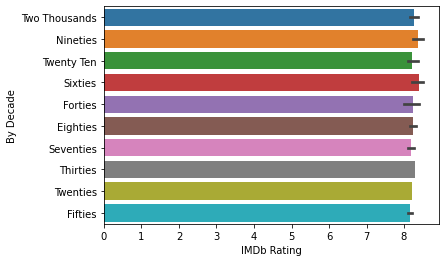

In [352]:

bargraph = sns.barplot(x='IMDb Rating',y='By Decade', data=results)

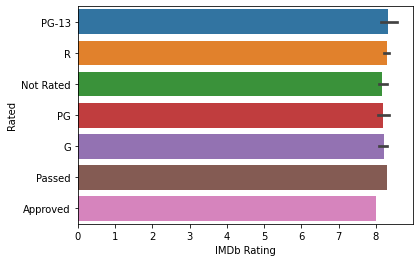

In [353]:
bargraph1 = sns.barplot(x='IMDb Rating',y='Rated', data=results)

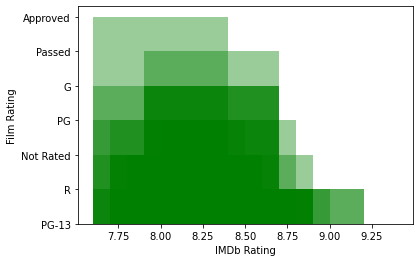

In [365]:
ratings_barplot = plt.bar(results['IMDb Rating'], results['Rated'], color='g', alpha=0.4)
ratings_barplot = plt.xlabel('IMDb Rating')
ratings_barplot = plt.ylabel('Film Rating')

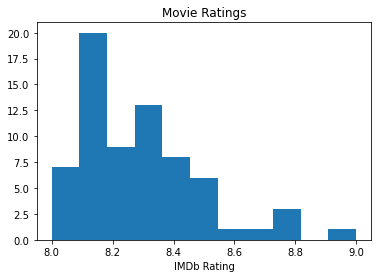

In [332]:
# The histogram below shows the distribution of IMDb Ratings.

rating_hist = plt.hist(results['IMDb Rating'], bins=11)
rating_hist = plt.title("Movie Ratings")
rating_hist = plt.xlabel('IMDb Rating')

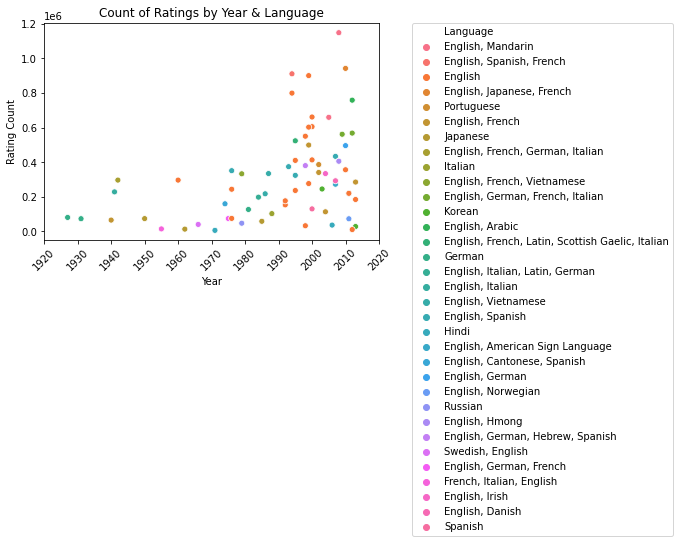

In [333]:
# Below is a scatterplot of Rating Count by Year. The colors are used to show 
# the various languages of the movies.

rating_count_scatter = sns.scatterplot(results['year'], results['ratingCount'], hue=results['Language'])
rating_count_scatter = plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0)
rating_count_scatter = plt.xlabel('Year')
rating_count_scatter = plt.ylabel('Rating Count')
rating_count_scatter = plt.title('Count of Ratings by Year & Language')
rating_count_scatter = plt.xticks([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], rotation=45)


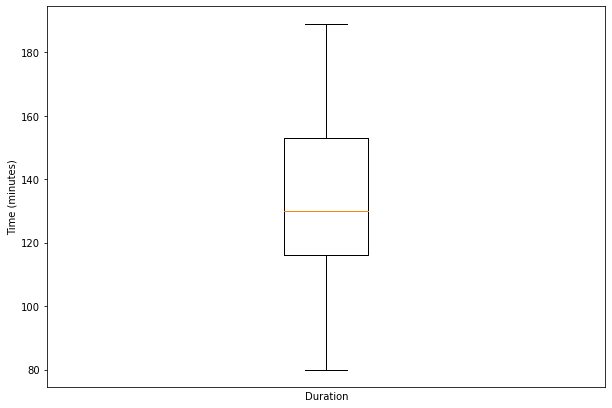

In [334]:
# Below is a boxplot of duration of movies.  It can be observed that there are
# no outliers.

time_boxplot = plt.figure(figsize =(10, 7))
time_boxplot = plt.boxplot(results['duration'])
time_boxplot = plt.xlabel('Duration')
time_boxplot = plt.ylabel('Time (minutes)')
time_boxplot = plt.xticks([])

## Summary

In order to complete this project, I had to learn many techniques that I previously thought of as intimidating.  The most difficult was surprisingly finding data sets of three different sources.  There is so much out there with potential, and without knowing exactly how I would be transforming these in the future made it tricky.  I ended up going through three different APIs before deciding the one that would work best with my project.


I focused on movies and IMDb ratings, specifically, but also explored genres, movie years, and movie rating (PG, R, etc.).  I started with a CSV file where I did some cleansing, including visualizations, in order to identify any outliers.  Due to the extensive amount of data in this file, I chose to remove rows with missing values in the columns that I would be focusing on.   The remaining columns that had missing variables, I substituted with zero.  Some column header formatting was required, and in the end, the CSV file was a clean dataframe.


To clean and format the website, I used the BeautifulSoup library.  I used the exercises in the book to obtain the data from a website and transform the table from html into a dataframe.  Some additional formatting and cleansing was required, such as splitting columns, dropping columns and removing parenthesis around each ‘year’ observation after splitting.  This dataframe required the most cleansing and transformation of them all.  I was pleased with the outcome.


Connecting to the API in order to pull the data was more challenging than the previous tasks.  I used tthe titles in my dataframe from the website file to pull data from the API.  I created a loop so that each title of the website movies was pulled from the API and added to the list.  Then I used the list to create a dataframe.  I was able to obtain additional information on each film from the website milestone.  Similar transformations and formatting were required to clean the dataset.  


Finally, I used sqlite 3 library to create a database, and add each dataframe as a separate table.  I used a loop to show me the first 5 rows in order to check that each table was added correctly.  Then I used JOIN to merge the tables on the primary key of title.  Once converting the joined tables to a dataframe, I created multiple visualizations to represent the cleansed data.  
